# TEST

In [2]:
print('test')

test


In [3]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import imageio

d:\ProgramData\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [4]:
# PIL

im = Image.open('D:/Coding/Python/ImageProcessing/images/lowlight.png')
# im.show()

im_g = im.convert("RGB")
im_g.show()

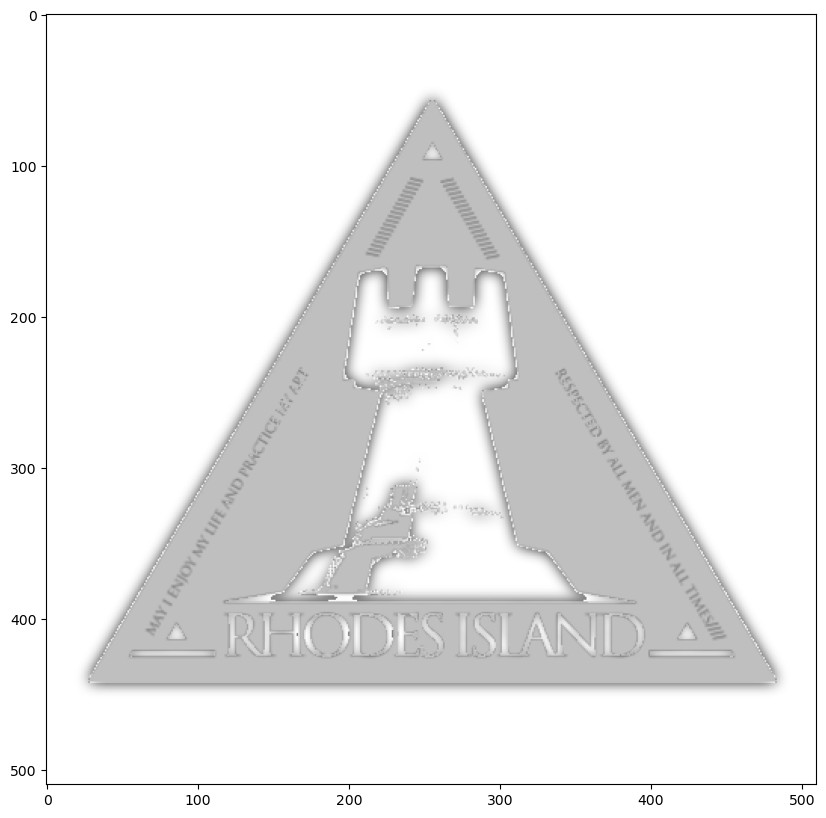

In [5]:
# mathplotlib

im = mpimg.imread("../images/Rhodes_Island.png")
plt.figure(figsize=(10,10))
im[im>0.5] -= 0.5
plt.imshow(im) # display the image
plt.axis('on')
plt.show()

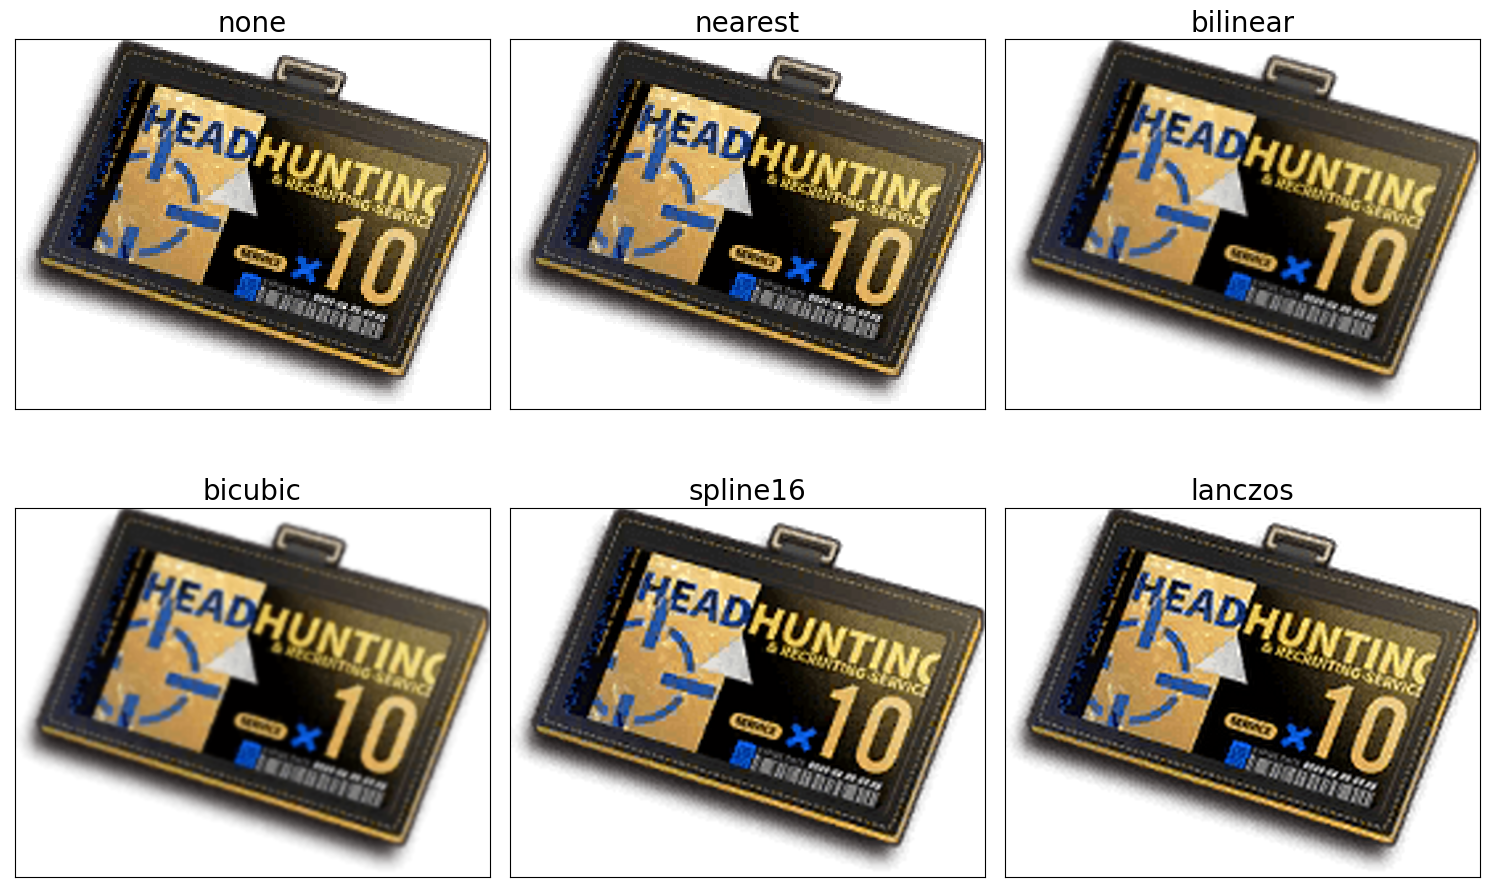

In [6]:
# mathplotlib

im = mpimg.imread("D:/Coding/Python/ImageProcessing/images/Headhunt10.png") 
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
    
plt.tight_layout()
plt.show()

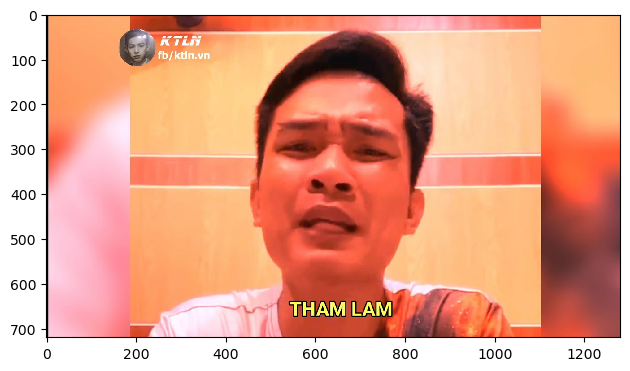

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x24282957d90>, None)

In [7]:
# scikit-image

im = imread("D:/Coding/Python/ImageProcessing/images/ThamLam.jpg") 
# print(im.shape, im.dtype, type(im))
# hsv = color.rgb2hsv(im) # from RGB to HSV color space
# hsv[:, :, 1] = 0.5 # change the saturation
# im1 = color.hsv2rgb(hsv) # from HSV back to RGB
# imsave('D:/Coding/Python/ImageProcessing/images/SiuThamLam.jpg', im1) # save image to disk
# im = imread("D:/Coding/Python/ImageProcessing/images/SiuThamLam.jpg")
plt.axis('on'), imshow(im), show()


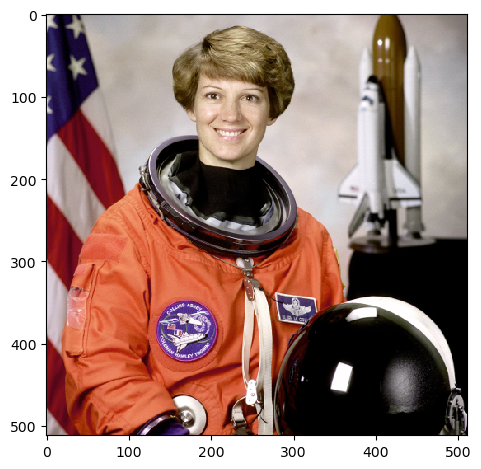

(<matplotlib.image.AxesImage at 0x242829ae310>, None)

In [8]:
# scikit-image's astronaut dataset

im = data.astronaut()
# imsave('D:/Coding/Python/ImageProcessing/images/Astronaut.png', im)
imshow(im), show()

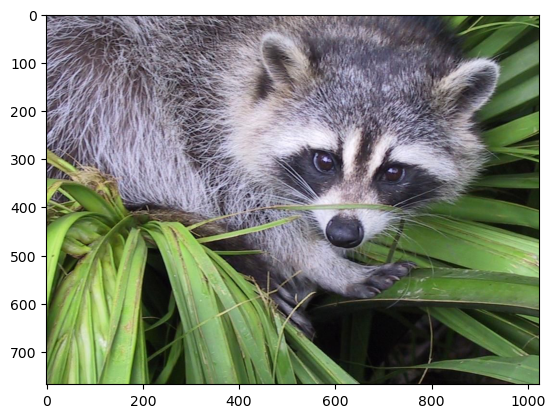

(<matplotlib.image.AxesImage at 0x24282294e20>,
 (-0.5, 1023.5, 767.5, -0.5),
 None)

In [9]:
# Using scipy.misc's face dataset

im = misc.face()
plt.imshow(im), plt.axis('on'), plt.show()

(<matplotlib.image.AxesImage at 0x24282a10640>, (-0.5, 1764.5, 1234.5, -0.5))

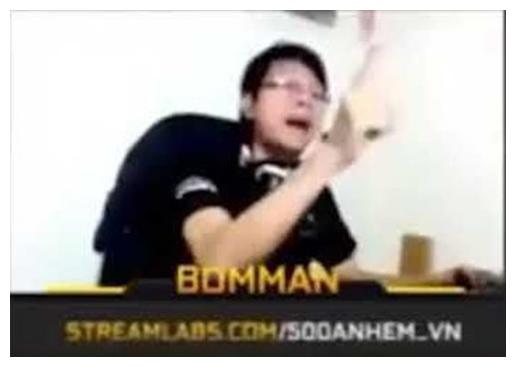

In [10]:
im = Image.open('../images/veryEasy.jpg')

im_large = im.resize((im.width*5, im.height*5), Image.BICUBIC)
plt.imshow(im_large), plt.axis('off')

[0. 0. 0. 0.]


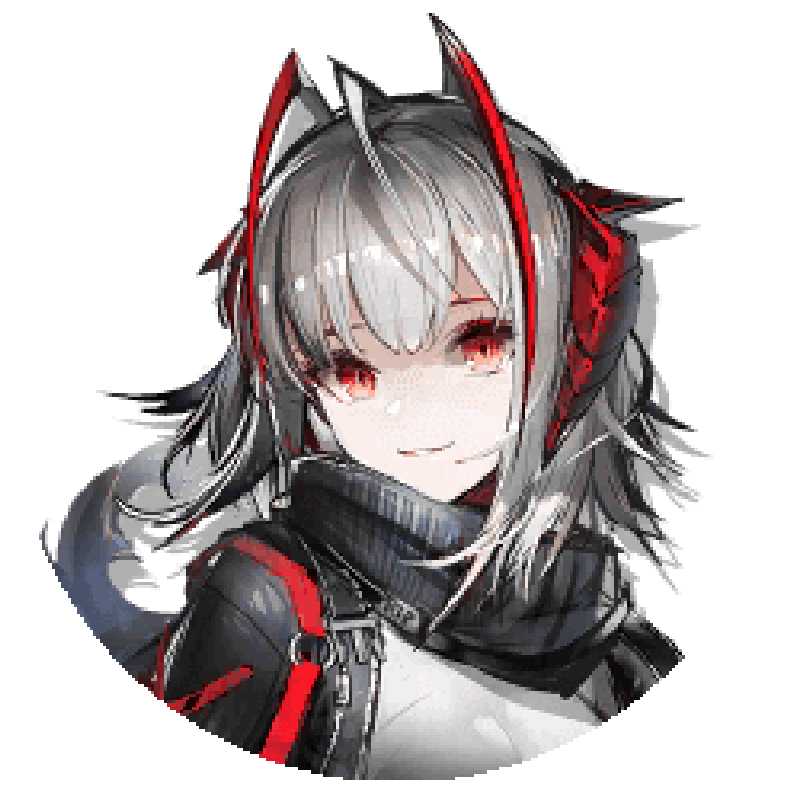

(<matplotlib.image.AxesImage at 0x24282a5d5e0>,
 (-0.5, 241.5, 240.5, -0.5),
 None)

In [11]:
ww = mpimg.imread("../images/w.png") # read the image from disk as anumpy ndarray
print(ww[0, 40])
# [180 76 83]
# print(lena[10:13, 20:23,0:1]) # slicing
lx, ly, _ = ww.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
ww[mask,:] = 0 # masks
plt.figure(figsize=(10,10))
plt.imshow(ww), plt.axis('off'), plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


<Figure size 640x480 with 0 Axes>

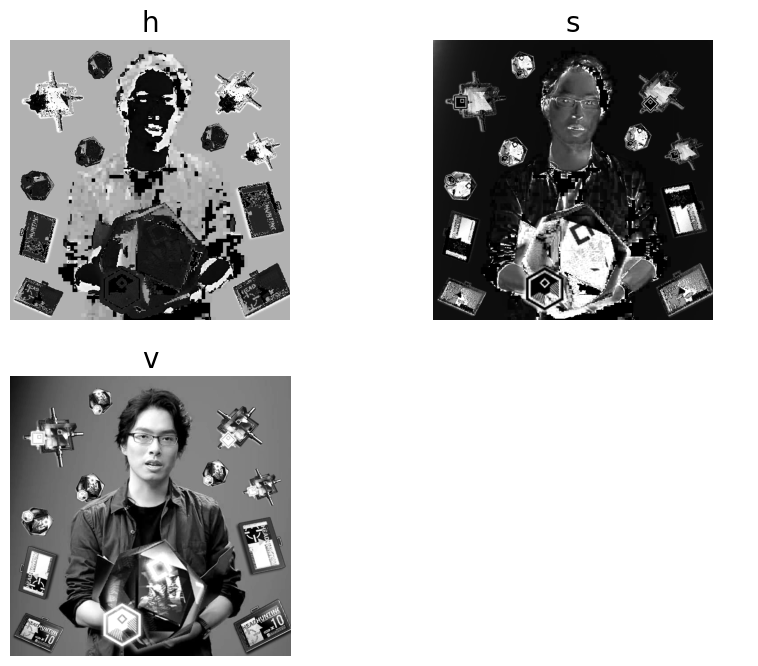

In [87]:
im = Image.open("../images/lowlight_with_power.png")

im_hsv = color.rgb2hsv(np.array(im.convert("RGB")))
plt.gray()
plt.figure(figsize=(10,8))
imsave("../images/lowlight_with_power_h.png", im_hsv[...,0])
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()

In [79]:
im = Image.open("../images/Headhunt10.png")
im.save("../images/Headhunt10.bmp")
im.convert("RGB").save("../images/Headhunt10.jpg")

d:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


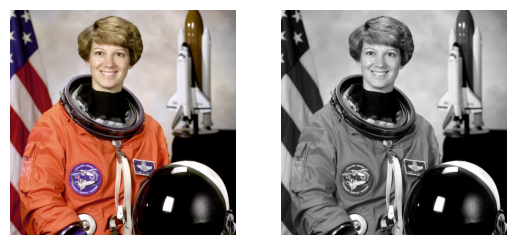

In [58]:
im = imread("../images/Astronaut.png")
# Image.fromarray(im).save("../images/arknightsc8.png")
im_g = color.rgb2gray(im)
# imsave("../images/Astronaut_g.png", im_g)
plt.subplot(1,2,1), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

(512, 512, 3)


C:\Users\fpt\AppData\Local\Temp\ipykernel_1768\349554428.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  res[i,j] = (im[i,j,0] + im[i,j,1] + im[i,j,2]) / 3
Lossy conversion from float64 to uint8. Range [0.0, 85.0]. Convert image to uint8 prior to saving to suppress this warning.


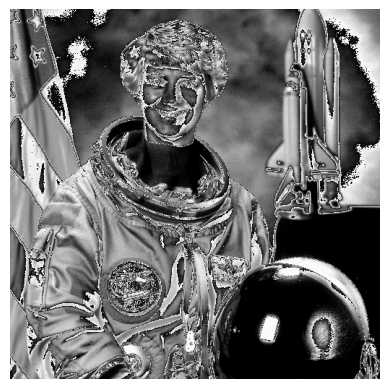

In [59]:
im = imread("../images/Astronaut.png")

print(im.shape)

w,h = im.shape[0:2]
res = np.ndarray(shape=(w,h))
# print(res.shape)

for i in range(w): 
    for j in range(h):
        res[i,j] = (im[i,j,0] + im[i,j,1] + im[i,j,2]) / 3

plt.imshow(res), plt.axis('off')
imsave("../images/Astronaut_g.png", res)

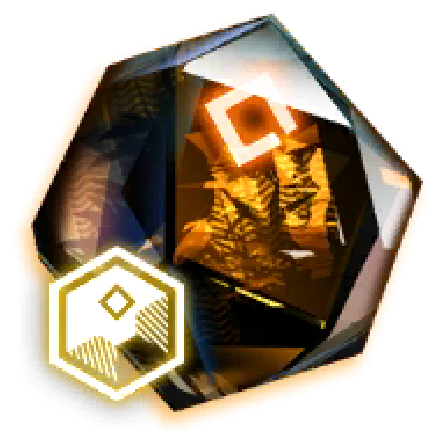

((-0.5, 179.5, 181.5, -0.5), None)

In [15]:
im = Image.open('../images/Originite_Prime.png') # read image into an Image object with PIL
im = np.array(im) # create a numpy ndarray from the Image object
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()


In [16]:
im = imread('../images/Orundum.png') # read image into numpy ndarray with skimage
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray
im.show() # display the image with PIL Image.show() method
im_g = im.convert("L")
im_g.show()

14


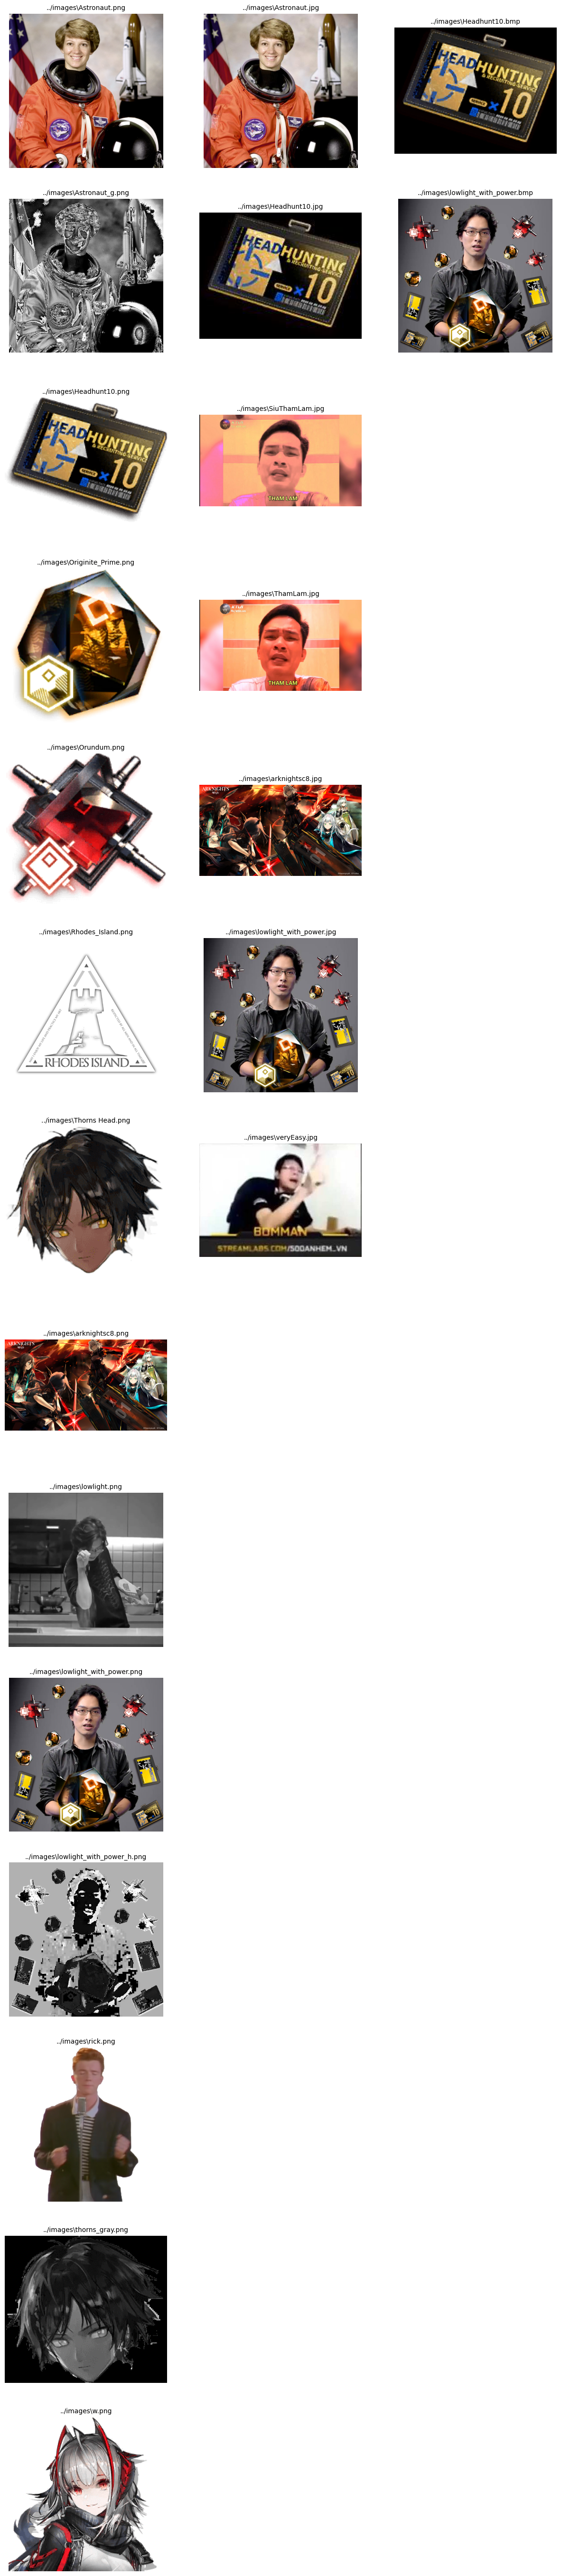

In [88]:
im_png = imread_collection("../images/*.png")
im_jpg = imread_collection("../images/*.jpg")
im_bmp = imread_collection("../images/*.bmp")

row = max(len(im_png), max(len(im_jpg), len(im_bmp)))
print(row)
# print(ims.files)

plt.figure(figsize=(15,5*row))

for i in range(len(im_png)):
    k = i * 3
    plt.subplot(row,3,k+1), plt.imshow(im_png[i]), plt.title(im_png.files[i], size=10), plt.axis('off')

for i in range(len(im_jpg)):
    k = i * 3 + 1
    plt.subplot(row,3,k+1), plt.imshow(im_jpg[i]), plt.title(im_jpg.files[i], size=10), plt.axis('off')

for i in range(len(im_bmp)):
    k = i * 3 + 2
    plt.subplot(row,3,k+1), plt.imshow(im_bmp[i]), plt.title(im_bmp.files[i], size=10), plt.axis('off')

plt.show()
